<a href="https://colab.research.google.com/github/adrien50/basicprojectmachinelearning/blob/main/Extreme_Gradient_Boosting_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extreme Gradient Boosting Algorithm

Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.

Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit, much like a neural network.

For more on gradient boosting, see the tutorial:

A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning
Extreme Gradient Boosting, or XGBoost for short is an efficient open-source implementation of the gradient boosting algorithm. As such, XGBoost is an algorithm, an open-source project, and a Python library.

XGBoost Scikit-Learn API

XGBoost can be installed as a standalone library and an XGBoost model can be developed using the scikit-learn API.

The first step is to install the XGBoost library if it is not already installed. This can be achieved using the pip python package manager on most platforms; for example:

In [37]:
!pip install xgboost

XGBoost Ensemble for Classification

In this section, we will look at using XGBoost for a classification problem.

First, we can use the make_classification() function to create a synthetic binary classification problem with 1,000 examples and 20 input features.

The complete example is listed below.

In [38]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Next, we can evaluate an XGBoost model on this dataset.

We will evaluate the model using repeated stratified k-fold cross-validation, with three repeats and 10 folds. We will report the mean and standard deviation of the accuracy of the model across all repeats and folds.

In [39]:
# evaluate xgboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = XGBClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.899 (0.029)


In this case, we can see the XGBoost ensemble with default hyperparameters achieves a classification accuracy of about 92.5 percent on this test dataset.

We can also use the XGBoost model as a final model and make predictions for classification.

First, the XGBoost ensemble is fit on all available data, then the predict() function can be called to make predictions on new data. Importantly, this function expects data to always be provided as a NumPy array as a matrix with one row for each input sample.

The example below demonstrates this on our binary classification dataset.

In [40]:
# make predictions using xgboost for classification
from numpy import asarray
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = XGBClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]
row = asarray([row])
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


Running the example fits the XGBoost ensemble model on the entire dataset and is then used to make a prediction on a new row of data, as we might when using the model in an application.


XGBoost Ensemble for Regression

In this section, we will look at using XGBoost for a regression problem.

First, we can use the make_regression() function to create a synthetic regression problem with 1,000 examples and 20 input features.

The complete example is listed below.

In [41]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


As we did with the last section, we will evaluate the model using repeated k-fold cross-validation, with three repeats and 10 folds. We will report the mean absolute error (MAE) of the model across all repeats and folds. The scikit-learn library makes the MAE negative so that it is maximized instead of minimized. This means that larger negative MAE are better and a perfect model has a MAE of 0.

In [42]:
# evaluate xgboost ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = XGBRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -62.762 (3.219)


We can also use the XGBoost model as a final model and make predictions for regression.

First, the XGBoost ensemble is fit on all available data, then the predict() function can be called to make predictions on new data. As with classification, the single row of data must be represented as a two-dimensional matrix in NumPy array format.

The example below demonstrates this on our regression dataset.

In [43]:
# gradient xgboost for making predictions for regression
from numpy import asarray
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = XGBRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.20543991,-0.97049844,-0.81403429,-0.23842689,-0.60704084,-0.48541492,0.53113006,2.01834338,-0.90745243,-1.85859731,-1.02334791,-0.6877744,0.60984819,-0.70630121,-1.29161497,1.32385441,1.42150747,1.26567231,2.56569098,-0.11154792]
row = asarray([row])
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

[16:38:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Prediction: 28


XGBoost Hyperparameters

In this section, we will take a closer look at some of the hyperparameters you should consider tuning for the Gradient Boosting ensemble and their effect on model performance.

Explore Number of Trees

An important hyperparameter for the XGBoost ensemble algorithm is the number of decision trees used in the ensemble.

Recall that decision trees are added to the model sequentially in an effort to correct and improve upon the predictions made by prior trees. As such, more trees is often better.

The number of trees can be set via the “n_estimators” argument and defaults to 100.

The example below explores the effect of the number of trees with values between 10 to 5,000.


>10 0.829 (0.037)
>50 0.871 (0.027)
>100 0.899 (0.029)
>500 0.927 (0.025)
>1000 0.927 (0.025)
>5000 0.927 (0.026)


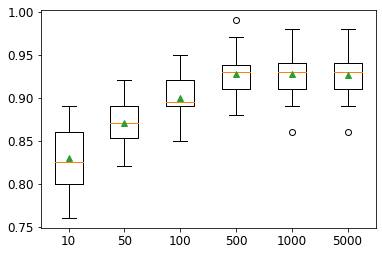

In [44]:
# explore xgboost number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	trees = [10, 50, 100, 500, 1000, 5000]
	for n in trees:
		models[str(n)] = XGBClassifier(n_estimators=n)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Explore Tree Depth

Varying the depth of each tree added to the ensemble is another important hyperparameter for gradient boosting.

The tree depth controls how specialized each tree is to the training dataset: how general or overfit it might be. Trees are preferred that are not too shallow and general (like AdaBoost) and not too deep and specialized (like bootstrap aggregation).

Gradient boosting generally performs well with trees that have a modest depth, finding a balance between skill and generality.

Tree depth is controlled via the “max_depth” argument and defaults to 6.

The example below explores tree depths between 1 and 10 and the effect on model performance.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see that that performance improves on this dataset until about 500 trees, after which performance appears to level off or decrease.

>1 0.833 (0.029)
>2 0.874 (0.031)
>3 0.899 (0.029)
>4 0.916 (0.030)
>5 0.922 (0.030)
>6 0.923 (0.030)
>7 0.920 (0.026)
>8 0.916 (0.032)
>9 0.919 (0.028)
>10 0.918 (0.029)


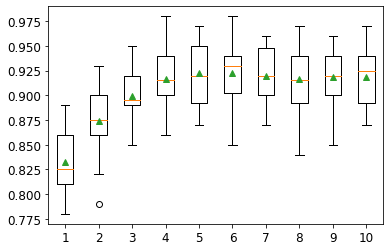

In [45]:
# explore xgboost tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,11):
		models[str(i)] = XGBClassifier(max_depth=i)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In this case, we can see that performance improves with tree depth, perhaps peeking around a depth of 3 to 8, after which the deeper, more specialized trees result in worse performance.
We can see the general trend of increasing model performance with the tree depth to a point, after which performance begins to sit flat or degrade with the over-specialized trees.

Explore Learning Rate

Learning rate controls the amount of contribution that each model has on the ensemble prediction.

Smaller rates may require more decision trees in the ensemble.

The learning rate can be controlled via the “eta” argument and defaults to 0.3.

The example below explores the learning rate and compares the effect of values between 0.0001 and 1.0.

>0.0001 0.899 (0.029)
>0.0010 0.899 (0.029)
>0.0100 0.899 (0.029)
>0.1000 0.899 (0.029)
>1.0000 0.899 (0.029)


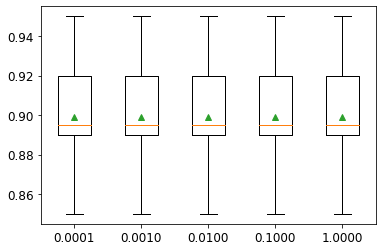

In [46]:
# explore xgboost learning rate effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
	for r in rates:
		key = '%.4f' % r
		models[key] = XGBClassifier(eta=r)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Running the example first reports the mean accuracy for each configured learning rate.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see that a larger learning rate results in better performance on this dataset. We would expect that adding more trees to the ensemble for the smaller learning rates would further lift performance.

This highlights the trade-off between the number of trees (speed of training) and learning rate, e.g. we can fit a model faster by using fewer trees and a larger learning rate.

We can see the general trend of increasing model performance with the increase in learning rate of 0.1, after which performance degrades.

Explore Number of Samples

The number of samples used to fit each tree can be varied. This means that each tree is fit on a randomly selected subset of the training dataset.

Using fewer samples introduces more variance for each tree, although it can improve the overall performance of the model.

The number of samples used to fit each tree is specified by the “subsample” argument and can be set to a fraction of the training dataset size. By default, it is set to 1.0 to use the entire training dataset.

The example below demonstrates the effect of the sample size on model performance with ratios varying from 10 percent to 100 percent in 10 percent increments.

>0.1 0.882 (0.034)
>0.2 0.903 (0.028)
>0.3 0.909 (0.030)
>0.4 0.913 (0.031)
>0.5 0.914 (0.026)
>0.6 0.908 (0.029)
>0.7 0.910 (0.025)
>0.8 0.911 (0.029)
>0.9 0.906 (0.028)
>1.0 0.899 (0.029)


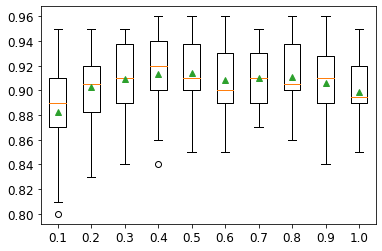

In [47]:
# explore xgboost subsample ratio effect on performance
from numpy import arange
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = XGBClassifier(subsample=i)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In this case, we can see that mean performance is probably best for a sample size that covers most of the dataset, such as 80 percent or higher.
We can see the general trend of increasing model performance, perhaps peaking around 80 percent and staying somewhat level.

Explore Number of Features

The number of features used to fit each decision tree can be varied.

Like changing the number of samples, changing the number of features introduces additional variance into the model, which may improve performance, although it might require an increase in the number of trees.

The number of features used by each tree is taken as a random sample and is specified by the “colsample_bytree” argument and defaults to all features in the training dataset, e.g. 100 percent or a value of 1.0. You can also sample columns for each split, and this is controlled by the “colsample_bylevel” argument, but we will not look at this hyperparameter here.

The example below explores the effect of the number of features on model performance with ratios varying from 10 percent to 100 percent in 10 percent increments.

>0.1 0.845 (0.038)
>0.2 0.883 (0.031)
>0.3 0.893 (0.032)
>0.4 0.901 (0.033)
>0.5 0.900 (0.033)
>0.6 0.903 (0.026)
>0.7 0.902 (0.028)
>0.8 0.902 (0.026)
>0.9 0.898 (0.028)
>1.0 0.899 (0.029)


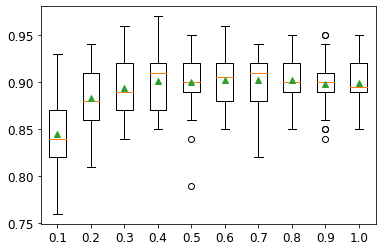

In [48]:
# explore xgboost column ratio per tree effect on performance
from numpy import arange
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = XGBClassifier(colsample_bytree=i)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

in this case, we can see that mean performance increases to about half the number of features (50 percent) and stays somewhat level after that. It’s surprising that removing half of the input variables per tree has so little effect.

We can see the general trend of increasing model performance perhaps peaking with a ratio of 60 percent and staying somewhat level.